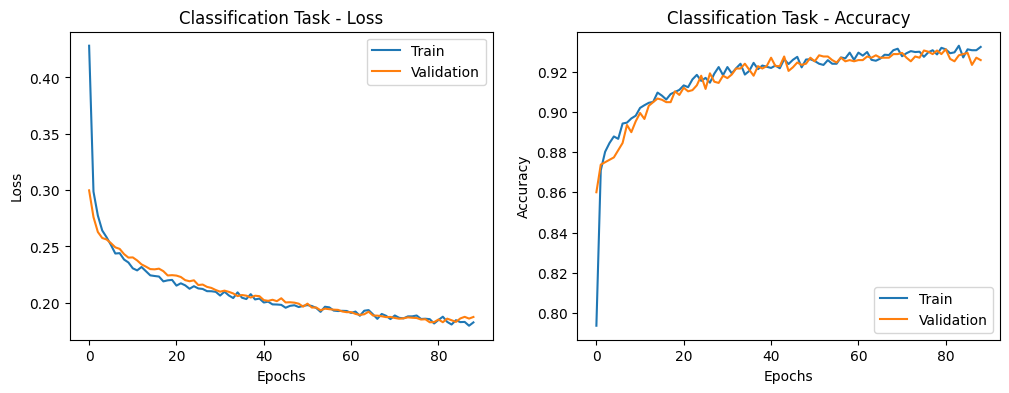

53/53 [==============================] - 0s 2ms/step
| Confusion Matrix     |   Positive (Actual) |   Negative (Actual) |
|:---------------------|--------------------:|--------------------:|
| Positive (Predicted) |                1051 |                  41 |
| Negative(predicted)  |                  75 |                 505 |
|                       |   Accuracy |   Precision |   Number of Samples |
|:----------------------|-----------:|------------:|--------------------:|
| CO(GT) classification |   0.930622 |    0.924908 |                1672 |


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, mean_squared_error, mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_classif
import tensorflow as tf
from tabulate import tabulate


# Reading the given dataset using pandas
data = pd.read_excel('/content/AirQualityUCI _ Students.xlsx')


# Handling missing values
data.replace(-200, pd.NA, inplace=True)


# Calculating mean of CO(GT)
mean_CO_GT = data['CO(GT)'].mean()

# Replacing missing value with mean of the feature column
features=['CO(GT)','PT08.S1(CO)','NMHC(GT)','C6H6(GT)','PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)','NO2(GT)','PT08.S4(NO2)', 'PT08.S5(O3)','T','RH','AH']
for f in features:
  meanValue=data[f].mean()
  data[f].fillna(meanValue, inplace=True)


# Spliting data into training and testing sets
features = ['PT08.S1(CO)','NMHC(GT)','C6H6(GT)','PT08.S2(NMHC)','NOx(GT)','NO2(GT)','PT08.S4(NO2)', 'PT08.S5(O3)','T','RH','AH']

X = data[features]
y = (data['CO(GT)'] > mean_CO_GT).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalization of dataset using Standardization technique
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# Building the classification model
classification_model = tf.keras.models.Sequential()

# Input layer and first hiden layer
classification_model.add(tf.keras.layers.Dense(36, input_dim=X_train.shape[1], activation='relu'))
# Dropouts  30% of the neuron from the previous layer
classification_model.add(tf.keras.layers.Dropout(0.3))
# Second hidden layer of NN
classification_model.add(tf.keras.layers.Dense(28, activation='elu'))
# Dropouts  30% of the neuron from the previous layer
classification_model.add(tf.keras.layers.Dropout(0.3))
# Third hidden layer of the NN
classification_model.add(tf.keras.layers.Dense(6, activation='elu'))

# Output layer of the NN
classification_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))


# Setting the learning rate, optimizer, loss function and metrics which you wanna focus on
learning_rate=0.001
classification_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate), loss='binary_crossentropy', metrics=['binary_accuracy',tf.keras.metrics.Precision()])


early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


# Training the model
history=classification_model.fit(X_train, y_train, epochs=150, batch_size=50,validation_data=(X_test, y_test),callbacks=[early_stopping],verbose=0)
#

# Plotting training & validation loss and accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Classification Task - Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['binary_accuracy'], label='Train')
plt.plot(history.history['val_binary_accuracy'], label='Validation')
plt.title('Classification Task - Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluating the model
y_pred = (classification_model.predict(X_test) > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
num_samples = len(y_test)

con_mat=pd.DataFrame({
    "Confusion Matrix":["Positive (Predicted)","Negative(predicted)"],
    "Positive (Actual)":[cm[0][0],cm[1][0]],
    "Negative (Actual)":[cm[0][1],cm[1][1]],
})


print(con_mat.to_markdown(index=False))

metrics= pd.DataFrame({
    "":["CO(GT) classification"],
    "Accuracy":[accuracy],
    "Precision": [precision],
    "Number of Samples":[num_samples]
})

print(metrics.to_markdown(index=False))





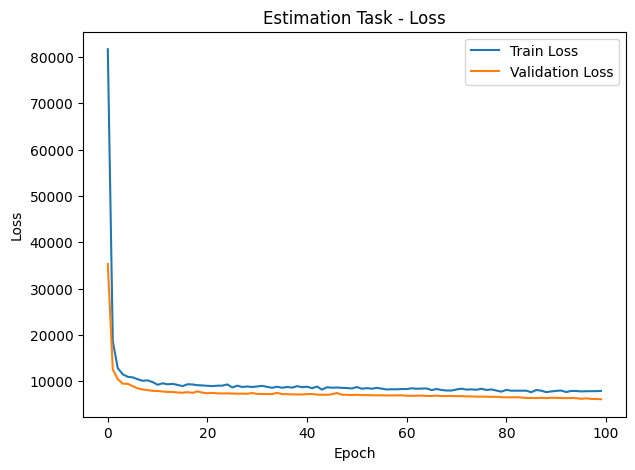

53/53 [==============================] - 0s 2ms/step


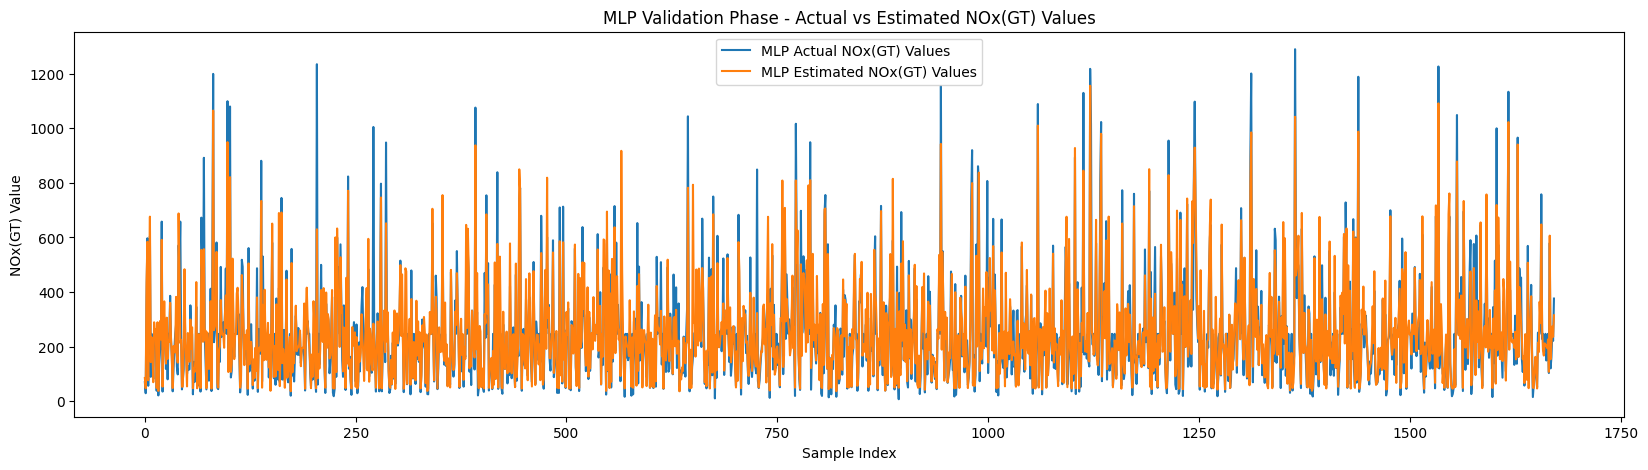

|    RMSE |     MAE |   Number of Samples |
|--------:|--------:|--------------------:|
| 78.0184 | 49.1878 |                1672 |


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [11]:
# Regression Task

# Splitting data into training and testing sets
features = ['NMHC(GT)','C6H6(GT)','PT08.S2(NMHC)','PT08.S3(NOx)','NO2(GT)','PT08.S4(NO2)', 'PT08.S5(O3)','T','RH','AH']
for f in features:
  meanValue=data[f].mean()
  data[f].fillna(meanValue, inplace=True)
mean_NOx=data['NOx(GT)'].mean()
data['NOx(GT)'].fillna(mean_NOx,inplace=True)
X = data[features]
y = data['NOx(GT)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalization of dataset using Standardization technique
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# Building the regression model
regression_model = tf.keras.models.Sequential()

# Input layer and first hiden layer
regression_model.add(tf.keras.layers.Dense(36,input_dim=X_train.shape[1], activation='relu'))
# Dropouts  20% of the neuron from the previous layer
regression_model.add(tf.keras.layers.Dropout(0.2))
# Second hidden layer of NN
regression_model.add(tf.keras.layers.Dense(28, activation='relu'))
# Dropouts  20% of the neuron from the previous layer
regression_model.add(tf.keras.layers.Dropout(0.2))
# Third hidden layer of NN
regression_model.add(tf.keras.layers.Dense(6, activation='relu'))

# Output layer of the NN
regression_model.add(tf.keras.layers.Dense(1))

# Setting the optimizer, loss function and metrics which you wanna focus on
regression_model.compile(optimizer='adam', loss='mean_squared_error',metrics=[tf.keras.metrics.MeanSquaredError(), tf.keras.metrics.RootMeanSquaredError()])



# Training the model
history = regression_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test),verbose=0)




# Plotting training & validation loss values
plt.figure(figsize=(7, 5))
plt.subplot(1, 1, 1)

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title('Estimation Task - Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()
# Predicting values of test data
y_pred = regression_model.predict(X_test)


# Plotting actual vs predicted values
plt.figure(figsize=(20, 5))
plt.subplot(1, 1, 1)

plt.plot(range(len(y_test)), y_test, label='MLP Actual NOx(GT) Values')
plt.plot(range(len(y_pred)), y_pred, label='MLP Estimated NOx(GT) Values')

plt.title('MLP Validation Phase - Actual vs Estimated NOx(GT) Values')
plt.xlabel('Sample Index')
plt.ylabel('NOx(GT) Value')
plt.legend()

plt.show()

# Calculating performance metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
num_samples = len(y_test)


metrics= pd.DataFrame({
    "RMSE":[rmse],
    "MAE":[mae],
    "Number of Samples": [num_samples],
})

print(metrics.to_markdown(index=False))

# # Save the models
classification_model.save('classification_model.h5')
regression_model.save('regression_model.h5')